In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [5]:
def get_numpy_data(input_data,output):
    
    
    x = input_data.as_matrix()
    
    y = output.as_matrix()
    
    return x,y
    

In [6]:
train_set = pd.read_csv('kc_house_data_small_train.csv',dtype=dtype_dict)
test_set = pd.read_csv('kc_house_data_small_test.csv',dtype=dtype_dict)
valid_set = pd.read_csv('kc_house_data_validation.csv',dtype=dtype_dict)
train_set['constant'] = 1
test_set['constant'] = 1
valid_set['constant'] = 1

In [7]:
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,constant
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,1
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,1
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0,1
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0,1
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,1


In [8]:
features = [k for k,v in dtype_dict.items() if train_set[k].dtypes != object]
features.remove('price')
features = ['constant'] + features
features

['constant',
 'bathrooms',
 'waterfront',
 'sqft_above',
 'sqft_living15',
 'grade',
 'yr_renovated',
 'bedrooms',
 'long',
 'sqft_lot15',
 'sqft_living',
 'floors',
 'condition',
 'lat',
 'sqft_basement',
 'yr_built',
 'sqft_lot',
 'view']

In [9]:
train_x,train_y = get_numpy_data(train_set[features],train_set['price'])
test_x,test_y = get_numpy_data(test_set[features],test_set['price'])
valid_x,valid_y = get_numpy_data(valid_set[features],valid_set['price'])

In [10]:
train_x

array([[  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.95500000e+03,   5.65000000e+03,   0.00000000e+00],
       [  1.00000000e+00,   2.25000000e+00,   0.00000000e+00, ...,
          1.95100000e+03,   7.24200000e+03,   0.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.93300000e+03,   1.00000000e+04,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   2.50000000e+00,   0.00000000e+00, ...,
          2.00300000e+03,   5.53600000e+03,   0.00000000e+00],
       [  1.00000000e+00,   2.50000000e+00,   0.00000000e+00, ...,
          2.01400000e+03,   6.02300000e+03,   0.00000000e+00],
       [  1.00000000e+00,   2.50000000e+00,   0.00000000e+00, ...,
          2.00900000e+03,   1.13100000e+03,   0.00000000e+00]])

In [11]:
def normalize_feature(input_feature):
    
    norms = (np.sqrt(np.sum(input_feature**2,axis=0)))
    
    normalized_inputs = input_feature/norms
    
    return (normalized_inputs,norms)

In [12]:
features_train , norms = normalize_feature(train_x)

In [13]:
features_test = test_x/norms
features_valid = valid_x/norms

In [14]:
np.sqrt(np.sum((features_test[0] - features_train[9])**2))

0.059723593713980783

5527

In [25]:
distance = np.zeros((10))
for i in range(10):
    distance[i] = np.sqrt(np.sum((features_test[0] - features_train[i])**2))
    
    

In [30]:
distance.min()

0.052383627840220305

In [37]:
result = features_train[0:10]-features_test[0]
np.sqrt(np.sum(result**2,axis=1))[8]


0.052383627840220305

In [38]:
result = features_train[0:3]-features_test[0]

In [39]:
results = features_train[0:3] - features_test[0]
print(results[0] - (features_train[0]-features_test[0]))
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print(results[1] - (features_train[1]-features_test[0]))
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print(results[2] - (features_train[2]-features_test[0]))
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [40]:
diff = features_train[0:] - features_test[0]

In [41]:
diff.shape

(5527, 18)

In [42]:
diff[-1].sum()

-0.09343399874654644

In [43]:
np.sum(diff**2,axis=1)[15]

0.0033070590284564453

In [44]:
np.sum(diff[15]**2)

0.0033070590284564453

In [45]:
np.sqrt(np.sum(diff**2,axis=1))[100]

0.023708232416678198

In [46]:
def compute_distances(input_feature,query_feature):
    
    distance = input_feature - query_feature
    euclidean = np.sqrt(np.sum(distance**2,axis=1))
    return euclidean   

In [47]:
euclidian_dist = compute_distances(features_train,features_test[2])

In [48]:
euclidian_dist.argmin()

382

In [49]:
train_y[382]

249000.0

In [56]:
def k_nearest_neighbor(k,input_feature,query_feature):
    
    distance = compute_distances(features_train,query_feature)
    
    return distance,np.argsort(distance)[0:k]    

In [67]:
distance.argsort()[0:4]

array([ 382, 1149, 4087, 3142], dtype=int64)

In [65]:
distance,sor = k_nearest_neighbor(4,features_train,query_feature=features_test[2])

In [134]:
def predict_output_of_query(k, features_train, output_train, features_query):
    
    k_neighbors = k_nearest_neighbor(k,features_train,features_query)
    prediction = np.mean(output_train[k_neighbors])
    return prediction

In [135]:
predict_output_of_query(4,features_train,train_y,features_test[2])

413987.5

In [136]:
for m in range(10):
    print(m,predict_output_of_query(10,features_train,train_y,features_test[m]))

0 881300.0
1 431860.0
2 460595.0
3 430200.0
4 766750.0
5 667420.0
6 350032.0
7 512800.7
8 484000.0
9 457235.0


In [68]:
def compute_distance_k_all(k,feature_matrix,output_values,feature_vector):
    
    no_rows = feature_vector.shape[0]
    predicted_values = []
    for i in range(no_rows):
        prediction = predict_output_of_query(k,feature_matrix,output_values,feature_vector[i].reshape((1,-1)))
        predicted_values.append(prediction)
        
    return predicted_values

In [197]:
rss_all = []

for k in range(1,16):
    prediction = compute_distance_k_all(k,features_train,train_y,features_valid)
    rss = np.sum((prediction - valid_y)**2)
    rss_all.append(rss)

In [198]:
rss_all

[105453830251561.0,
 83445073504025.5,
 72692096019202.563,
 71946721652091.688,
 69846517419718.602,
 68899544353180.836,
 68341973450051.094,
 67361678735491.5,
 68372727958976.094,
 69335048668556.742,
 69523855215598.828,
 69049969587246.172,
 70011254508263.688,
 70908698869034.344,
 71106928385945.156]

In [201]:

prediction = compute_distance_k_all(8,features_train,train_y,features_test)
rss = np.sum((prediction - test_y)**2)
rss

133118823551516.81

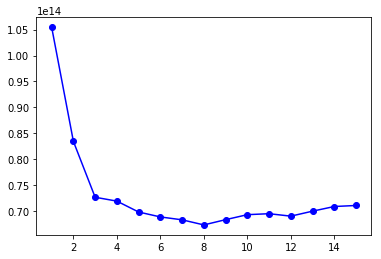

In [202]:
kvals = range(1,16)
plt.plot(kvals,rss_all,'bo-')